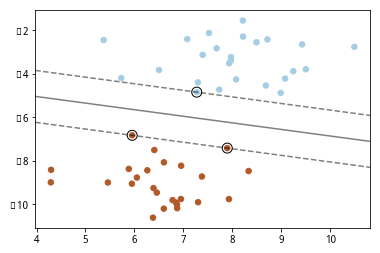

In [1]:
#先导入要用的库
import numpy as np
import matplotlib.pyplot as plt
#导入支持向量机分类模型
from sklearn import svm
#这里我们用scikit-learn自带的样本生成工具
from sklearn.datasets import make_blobs
#生成50个样本，分成2个类
#注意cluster_std设为1，使两类样本比较容易区分
X, y = make_blobs(n_samples=50, centers=2, random_state=6,cluster_std=1)
#创建svc实例，选择线性内核
#正则化参数我们设大一点，为1000
clf = svm.SVC(kernel='linear', C=1000)
#拟合样本数据
clf.fit(X, y)
#下面来画图，首先是用散点图来绘制样本
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#然后找到样本的上下限
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在画布中创建网格，以便绘制决策边界
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
#绘制决策边界
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#找出支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#显示图像
plt.show()

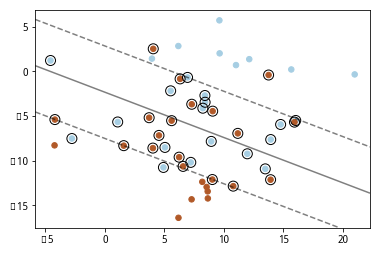

In [2]:
#重新生成数据，这次把cluster_std增加到3
X, y = make_blobs(n_samples=50, centers=2, random_state=6,cluster_std=5)
#下面的代码不变
clf = svm.SVC(kernel='linear', C=1000)
#拟合样本数据
clf.fit(X, y)
#下面来画图，首先是用散点图来绘制样本
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#然后找到样本的上下限
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
#在画布中创建网格，以便绘制决策边界
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
#绘制决策边界
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
#找出支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
#显示图像
plt.show()

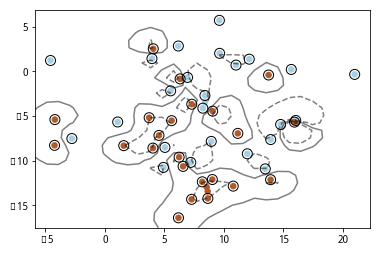

In [3]:
#在创建一个支持向量机实例
#这次把kernel设置为rbf
clf2 = svm.SVC(kernel='rbf', C=1000)
#拟合数据
clf2.fit(X, y)
#下面画图的部分同上
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
Z2 = clf2.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
ax.scatter(clf2.support_vectors_[:, 0], clf2.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [4]:
import jqdata
from jqfactor import get_factor_values
from jqfactor import get_factor_kanban_values

In [5]:
kanban = get_factor_kanban_values(bt_cycle = 'month_3',
                             skip_paused = True,
                             )
kanban.head()

,date,category,code,universe,bt_cycle,skip_paused,commision_slippage,compound_return_1q,compound_return_5q,annual_return_1q,annual_return_5q,max_drawdown_1q,max_drawdown_5q,sharpe_1q,sharpe_5q,turnover_mean_1q,turnover_mean_5q,annual_return_bm,ic_mean,ir,good_ic
0,2021-05-14,basics,net_interest_expense,hs300,month_3,True,0,-0.012753,-0.138488,-0.054738,-0.479934,0.061464,0.188054,-0.549766,-1.904589,0.006192,0.026832,-0.416659,-0.039767,-0.128809,0.982456
1,2021-05-14,basics,market_cap,hs300,month_3,True,0,-0.069782,-0.121774,-0.271862,-0.434205,0.104984,0.146964,-1.876829,-2.158624,0.010279,0.017614,-0.416659,-0.018922,-0.120366,0.877193
2,2021-05-14,basics,circulating_market_cap,hs300,month_3,True,0,-0.090997,-0.114290,-0.341934,-0.412751,0.124559,0.145758,-2.198096,-2.035054,0.013213,0.017024,-0.416659,-0.012072,-0.075032,0.929825
3,2021-05-14,basics,operating_cost_ttm,hs300,month_3,True,0,-0.150720,-0.145685,-0.511551,-0.498721,0.207392,0.179190,-1.761314,-2.282627,0.010869,0.024988,-0.416659,-0.007636,-0.058912,0.877193
4,2021-05-14,basics,financial_expense_ttm,hs300,month_3,True,0,-0.152880,-0.153169,-0.516975,-0.517699,0.192567,0.170608,-1.867727,-2.360149,0.018798,0.023849,-0.416659,-0.006770,-0.054058,0.842105


In [6]:
kanban1 = kanban.sort_values(by = 'annual_return_5q',ascending = False)
kanban1.head()

,date,category,code,universe,bt_cycle,skip_paused,commision_slippage,compound_return_1q,compound_return_5q,annual_return_1q,annual_return_5q,max_drawdown_1q,max_drawdown_5q,sharpe_1q,sharpe_5q,turnover_mean_1q,turnover_mean_5q,annual_return_bm,ic_mean,ir,good_ic
672,2021-05-14,style,book_to_price_ratio,zz500,month_3,True,0,-0.092250,0.141163,-0.345905,0.784535,0.191486,0.027192,-1.445814,4.582014,0.028709,0.023800,-0.111145,0.045374,0.186000,0.929825
670,2021-05-14,style,earnings_yield,zz500,month_3,True,0,-0.103575,0.117915,-0.380947,0.630493,0.188713,0.024764,-1.688841,3.737456,0.037378,0.031258,-0.111145,0.038880,0.224805,0.929825
666,2021-05-14,style,cash_earnings_to_price_ratio,zz500,month_3,True,0,-0.063503,0.115569,-0.250057,0.615540,0.120900,0.044013,-1.567806,3.000953,0.030662,0.031086,-0.111145,0.025021,0.176140,0.789474
658,2021-05-14,style,long_term_predicted_earnings_growth,zz500,month_3,True,0,0.136003,0.105461,0.749415,0.552315,0.056559,0.055152,3.435900,2.854009,0.048724,0.074858,-0.111145,-0.011109,-0.073724,0.912281
671,2021-05-14,style,predicted_earnings_to_price_ratio,zz500,month_3,True,0,-0.118799,0.091962,-0.425751,0.470881,0.200995,0.031436,-1.754869,2.666187,0.039150,0.031119,-0.111145,0.040157,0.209404,0.877193


In [7]:
kanban2 = kanban.sort_values(by = 'annual_return_1q',ascending = False)
kanban2.head()

,date,category,code,universe,bt_cycle,skip_paused,commision_slippage,compound_return_1q,compound_return_5q,annual_return_1q,annual_return_5q,max_drawdown_1q,max_drawdown_5q,sharpe_1q,sharpe_5q,turnover_mean_1q,turnover_mean_5q,annual_return_bm,ic_mean,ir,good_ic
658,2021-05-14,style,long_term_predicted_earnings_growth,zz500,month_3,True,0,0.136003,0.105461,0.749415,0.552315,0.056559,0.055152,3.435900,2.854009,0.048724,0.074858,-0.111145,-0.011109,-0.073724,0.912281
1168,2021-05-14,style,natural_log_of_market_cap,zzqz,month_3,True,0,0.093378,-0.091519,0.479264,-0.343590,0.050097,0.131028,2.601127,-1.886410,0.026644,0.015782,-0.270797,-0.038933,-0.204681,0.894737
1170,2021-05-14,style,size,zzqz,month_3,True,0,0.092803,-0.060450,0.475854,-0.239275,0.050424,0.107318,2.587697,-1.548093,0.026048,0.020207,-0.270797,-0.037635,-0.210874,0.877193
730,2021-05-14,technical,price_no_fq,zz500,month_3,True,0,0.085399,-0.101970,0.432497,-0.376071,0.032984,0.190107,2.229810,-1.569009,0.025590,0.020404,-0.111145,-0.040764,-0.156488,0.946429
558,2021-05-14,quality,OperatingCycle,zz500,month_3,True,0,0.080068,-0.051847,0.401897,-0.208248,0.052476,0.103643,1.871558,-1.351696,0.048420,0.035786,-0.111145,-0.021348,-0.152009,0.894737


In [8]:
factor1 = list(kanban1['code'][:10])
factor1

['book_to_price_ratio',
 'earnings_yield',
 'cash_earnings_to_price_ratio',
 'long_term_predicted_earnings_growth',
 'predicted_earnings_to_price_ratio',
 'book_to_price_ratio',
 'earnings_to_price_ratio',
 'OperateNetIncome',
 'market_leverage',
 'market_leverage']

In [9]:
factor2 = list(kanban2['code'][:10])
factor2

['long_term_predicted_earnings_growth',
 'natural_log_of_market_cap',
 'size',
 'price_no_fq',
 'OperatingCycle',
 'price_no_fq',
 'market_cap',
 'daily_standard_deviation',
 'account_receivable_turnover_days',
 'cumulative_range']

In [10]:
factor = factor1+factor2
factor

['book_to_price_ratio',
 'earnings_yield',
 'cash_earnings_to_price_ratio',
 'long_term_predicted_earnings_growth',
 'predicted_earnings_to_price_ratio',
 'book_to_price_ratio',
 'earnings_to_price_ratio',
 'OperateNetIncome',
 'market_leverage',
 'market_leverage',
 'long_term_predicted_earnings_growth',
 'natural_log_of_market_cap',
 'size',
 'price_no_fq',
 'OperatingCycle',
 'price_no_fq',
 'market_cap',
 'daily_standard_deviation',
 'account_receivable_turnover_days',
 'cumulative_range']

In [11]:
sec = get_index_stocks('000300.XSHG')
sec[:10]

['000001.XSHE',
 '000002.XSHE',
 '000063.XSHE',
 '000066.XSHE',
 '000069.XSHE',
 '000100.XSHE',
 '000157.XSHE',
 '000166.XSHE',
 '000333.XSHE',
 '000338.XSHE']

In [12]:
import datetime
import pandas as pd
import numpy as np
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
history = today - datetime.timedelta(days = 5)
yesterday,history

(datetime.date(2021, 5, 15), datetime.date(2021, 5, 11))

In [13]:
data = get_factor_values(sec, factor, end_date = yesterday, count = 1)
data

{'natural_log_of_market_cap': code        000001.XSHE  000002.XSHE     ...       688012.XSHG  688036.XSHG
 2021-05-14    26.838155    26.474225     ...          24.89331    25.578416
 
 [1 rows x 300 columns],
 'cumulative_range': code        000001.XSHE  000002.XSHE     ...       688012.XSHG  688036.XSHG
 2021-05-14     0.486277     0.183728     ...          0.742084     0.791288
 
 [1 rows x 300 columns],
 'earnings_to_price_ratio': code        000001.XSHE  000002.XSHE     ...       688012.XSHG  688036.XSHG
 2021-05-14     0.067423     0.132145     ...          0.009329       0.0244
 
 [1 rows x 300 columns],
 'daily_standard_deviation': code        000001.XSHE  000002.XSHE     ...       688012.XSHG  688036.XSHG
 2021-05-14     0.024603     0.018047     ...          0.034886     0.046601
 
 [1 rows x 300 columns],
 'OperatingCycle': code        000001.XSHE  000002.XSHE     ...       688012.XSHG  688036.XSHG
 2021-05-14          NaN  1176.226907     ...               NaN          NaN


In [14]:
df = pd.DataFrame(index = sec)
df.head()

""
000001.XSHE
000002.XSHE
000063.XSHE
000066.XSHE
000069.XSHE


In [15]:
for i in factor:
    df[i] = data[i].T
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range
000001.XSHE,0.587734,-0.202080,-0.100991,NaN,0.075809,0.067423,9.412182e+09,NaN,26.838155,0.867425,23.32,NaN,4.525460e+11,0.024603,NaN,0.486277
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728
000063.XSHE,-0.450228,-0.283825,0.091299,NaN,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,NaN,1.341587e+11,0.021934,NaN,0.432785
000066.XSHE,-0.758131,-0.838759,-0.028973,NaN,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369
000069.XSHE,2.022859,2.072622,0.434996,NaN,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,NaN,7.094552e+10,0.024305,NaN,0.492214


In [16]:
df['close1'] = list(get_price(sec,end_date = yesterday-datetime.timedelta(days=1), count=1,panel = False)['close'])
df['close2'] = list(get_price(sec,end_date = today-datetime.timedelta(days=1), count=1,panel = False)['close'])
df['return'] = df['close2'] / df['close1'] -1
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range,close1,close2,return
000001.XSHE,0.587734,-0.202080,-0.100991,NaN,0.075809,0.067423,9.412182e+09,NaN,26.838155,0.867425,23.32,NaN,4.525460e+11,0.024603,NaN,0.486277,23.32,23.32,0.0
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728,27.07,27.07,0.0
000063.XSHE,-0.450228,-0.283825,0.091299,NaN,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,NaN,1.341587e+11,0.021934,NaN,0.432785,29.08,29.08,0.0
000066.XSHE,-0.758131,-0.838759,-0.028973,NaN,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369,12.31,12.31,0.0
000069.XSHE,2.022859,2.072622,0.434996,NaN,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,NaN,7.094552e+10,0.024305,NaN,0.492214,8.65,8.65,0.0


In [17]:
df['signal'] = np.where(df['close2'] > df['close1'],1,0)
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range,close1,close2,return,signal
000001.XSHE,0.587734,-0.202080,-0.100991,NaN,0.075809,0.067423,9.412182e+09,NaN,26.838155,0.867425,23.32,NaN,4.525460e+11,0.024603,NaN,0.486277,23.32,23.32,0.0,0
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728,27.07,27.07,0.0,0
000063.XSHE,-0.450228,-0.283825,0.091299,NaN,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,NaN,1.341587e+11,0.021934,NaN,0.432785,29.08,29.08,0.0,0
000066.XSHE,-0.758131,-0.838759,-0.028973,NaN,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369,12.31,12.31,0.0,0
000069.XSHE,2.022859,2.072622,0.434996,NaN,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,NaN,7.094552e+10,0.024305,NaN,0.492214,8.65,8.65,0.0,0


In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
df = df.fillna(0)
X = df.drop(['close1','close2','return','signal'],axis=1)
scaler.fit(X)
X = scaler.transform(X)
y = df['signal']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, 
                                                    test_size=0.1,
                                                   random_state = 0)

In [21]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_train, y_train),clf.score(X_test, y_test)

ValueError: The number of classes has to be greater than one; got 1

In [22]:
mcap = get_factor_values(sec,'market_cap',end_date = yesterday, count = 1)['market_cap']
df['mcap'] = mcap.T
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range,close1,close2,return,signal,mcap
000001.XSHE,0.587734,-0.202080,-0.100991,0.000000,0.075809,0.067423,9.412182e+09,0.000000,26.838155,0.867425,23.32,0.000000,4.525460e+11,0.024603,0.000000,0.486277,23.32,23.32,0.0,0,4.525460e+11
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728,27.07,27.07,0.0,0,3.144920e+11
000063.XSHE,-0.450228,-0.283825,0.091299,0.000000,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,0.000000,1.341587e+11,0.021934,0.000000,0.432785,29.08,29.08,0.0,0,1.341587e+11
000066.XSHE,-0.758131,-0.838759,-0.028973,0.000000,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369,12.31,12.31,0.0,0,3.616587e+10
000069.XSHE,2.022859,2.072622,0.434996,0.000000,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,0.000000,7.094552e+10,0.024305,0.000000,0.492214,8.65,8.65,0.0,0,7.094552e+10


In [23]:
from sklearn.svm import SVR

In [28]:
X = df.drop(['close1','close2','return','signal','mcap'],axis=1)
X = scaler.fit_transform(X)
y = df['mcap']
reg = SVR().fit(X,y)
reg.score(X,y)

-0.0869428792500262

In [29]:
df['predict'] = reg.predict(X)
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range,close1,close2,return,signal,mcap,predict,diff
000001.XSHE,0.587734,-0.202080,-0.100991,0.000000,0.075809,0.067423,9.412182e+09,0.000000,26.838155,0.867425,23.32,0.000000,4.525460e+11,0.024603,0.000000,0.486277,23.32,23.32,0.0,0,4.525460e+11,8.496674e+10,3.675793e+11
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728,27.07,27.07,0.0,0,3.144920e+11,8.496674e+10,2.295253e+11
000063.XSHE,-0.450228,-0.283825,0.091299,0.000000,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,0.000000,1.341587e+11,0.021934,0.000000,0.432785,29.08,29.08,0.0,0,1.341587e+11,8.496674e+10,4.919195e+10
000066.XSHE,-0.758131,-0.838759,-0.028973,0.000000,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369,12.31,12.31,0.0,0,3.616587e+10,8.496674e+10,-4.880087e+10
000069.XSHE,2.022859,2.072622,0.434996,0.000000,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,0.000000,7.094552e+10,0.024305,0.000000,0.492214,8.65,8.65,0.0,0,7.094552e+10,8.496674e+10,-1.402122e+10


In [30]:
df['diff'] = df['mcap'] - df['predict']
df.head()

,book_to_price_ratio,earnings_yield,cash_earnings_to_price_ratio,long_term_predicted_earnings_growth,predicted_earnings_to_price_ratio,earnings_to_price_ratio,OperateNetIncome,market_leverage,natural_log_of_market_cap,size,price_no_fq,OperatingCycle,market_cap,daily_standard_deviation,account_receivable_turnover_days,cumulative_range,close1,close2,return,signal,mcap,predict,diff
000001.XSHE,0.587734,-0.202080,-0.100991,0.000000,0.075809,0.067423,9.412182e+09,0.000000,26.838155,0.867425,23.32,0.000000,4.525460e+11,0.024603,0.000000,0.486277,23.32,23.32,0.0,0,4.525460e+11,8.496674e+10,3.675793e+11
000002.XSHE,0.771452,2.072622,0.232188,0.299051,0.157175,0.132145,3.567860e+09,1.626574,26.474225,0.867425,27.07,1176.226907,3.144920e+11,0.018047,3.173558,0.183728,27.07,27.07,0.0,0,3.144920e+11,8.496674e+10,2.295253e+11
000063.XSHE,-0.450228,-0.283825,0.091299,0.000000,0.050349,0.042199,1.132738e+09,1.208874,25.622289,0.867425,29.08,0.000000,1.341587e+11,0.021934,0.000000,0.432785,29.08,29.08,0.0,0,1.341587e+11,8.496674e+10,4.919195e+10
000066.XSHE,-0.758131,-0.838759,-0.028973,0.000000,0.039096,0.029057,-7.071190e+07,1.158365,24.311382,-0.253953,12.31,297.403512,3.616587e+10,0.028370,102.503599,0.392369,12.31,12.31,0.0,0,3.616587e+10,8.496674e+10,-4.880087e+10
000069.XSHE,2.022859,2.072622,0.434996,0.000000,0.228294,0.179686,1.190629e+09,2.600071,24.985178,0.348214,8.65,0.000000,7.094552e+10,0.024305,0.000000,0.492214,8.65,8.65,0.0,0,7.094552e+10,8.496674e+10,-1.402122e+10


In [32]:
diff = pd.DataFrame(index = df.index)
diff['diff'] = df['diff']
diff = diff.sort_values(by = 'diff')
diff.head(10)

,diff
002773.XSHE,-6.565800e+10
600498.XSHG,-6.518737e+10
000627.XSHE,-6.485838e+10
600340.XSHG,-6.434143e+10
002456.XSHE,-6.192672e+10
000671.XSHE,-6.173988e+10
600297.XSHG,-6.087889e+10
600271.XSHG,-6.047206e+10
002958.XSHE,-6.018888e+10
002463.XSHE,-5.973903e+10
